<a href="https://colab.research.google.com/github/20wh1a6610/DeepLearning_Lab/blob/main/exp3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drie

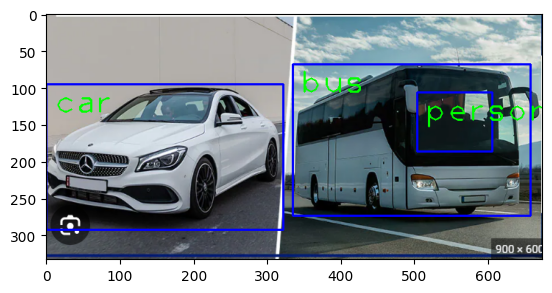

In [ ]:
!pip install opencv-contrib-python
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive'
import cv2
import matplotlib.pyplot as plt
config_file = '/content/drive/MyDrive/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model ='/content/drive/MyDrive/frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)
classLabels =[]
file_name = '/content/drive/MyDrive/labels.txt'
with open(file_name,'rt') as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels)
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)
img=cv2.imread('/content/drive/MyDrive/cd.png')
plt.imshow(img)
ClassIndex,confidence,bbox = model.detect(img,confThreshold =0.5)
print(ClassIndex)
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))